<a href="https://colab.research.google.com/github/Ayushman1025/Data-Analyst-Agent/blob/main/AI_AGENT_LLaMA4MAVERIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install together


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
  Attempting uninstall: typer
    Found existing installation: typer 0.16.0
    Uninstalling typer-0.16.0:
      Successfully uninstalled typer-0.16.0


In [ ]:
import os
import together
os.environ["TOGETHER_API_KEY"] = "bc045f5b43e1db5c40b7e24effd632aef0769ec21d0da35bd1294af34f4903fa"  # Replace with your key
together.api_key = os.environ["TOGETHER_API_KEY"]

In [ ]:
dir(together)

['AsyncClient',
 'AsyncComplete',
 'AsyncTogether',
 'Callable',
 'Client',
 'Complete',
 'Completion',
 'ContextVar',
 'Embeddings',
 'Files',
 'Finetune',
 'Image',
 'Models',
 'TYPE_CHECKING',
 'Together',
 'VERSION',
 '__all__',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'abstract',
 'aiosession',
 'annotations',
 'api_key',
 'client',
 'constants',
 'error',
 'filemanager',
 'legacy',
 'log',
 'requestssession',
 'resources',
 'together_response',
 'types',
 'utils',
 'version']

In [ ]:
import os
import requests

TOGETHER_API_KEY = os.environ.get("TOGETHER_API_KEY", "bc045f5b43e1db5c40b7e24effd632aef0769ec21d0da35bd1294af34f4903fa")  # replace if not set

def ask_llama(prompt):
    url = "https://api.together.xyz/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {TOGETHER_API_KEY}",
        "Content-Type": "application/json"
    }

    body = {
        "model": "meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
        "messages": [
            {"role": "system", "content": "You are a helpful data analyst."},
            {"role": "user", "content": prompt}
        ],
        "temperature": 0.7,
        "top_p": 0.9,
        "max_tokens": 512
    }

    response = requests.post(url, headers=headers, json=body)
    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content']
    else:
        raise Exception(f"Error: {response.status_code} - {response.text}")


In [ ]:
print(ask_llama("Explain the causes of global warming."))


Global warming, also known as climate change, is the gradual increase in the overall temperature of the Earth's atmosphere, primarily caused by human activities that release greenhouse gases, such as carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), into the atmosphere. The main causes of global warming can be summarized as follows:

1. **Burning of fossil fuels**: The burning of coal, oil, and natural gas for energy releases large amounts of CO2 into the atmosphere, accounting for approximately 65% of human-caused CO2 emissions.
2. **Deforestation and land-use changes**: The clearance of forests for agriculture, urbanization, and other purposes releases carbon stored in trees and reduces the ability of forests to act as carbon sinks.
3. **Agriculture**: The production of meat, especially beef, and other animal products leads to the release of methane and N2O through livestock digestion and manure.
4. **Industrial processes**: Various industrial processes, such as cement pr

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Football Data Test Task(Raw Data).csv to Football Data Test Task(Raw Data) (2).csv


In [ ]:
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()


,Incremental_ID,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1,E0,8/13/2005,NaN,Aston Villa,Bolton,2,2,D,2,...,2,6,14,16,7,8,0,2,0,0
1,2,E0,8/13/2005,NaN,Everton,Man United,0,2,A,0,...,5,5,15,14,8,6,3,1,0,0
2,3,E0,8/13/2005,NaN,Fulham,Birmingham,0,0,D,0,...,7,4,12,13,6,6,1,2,0,0
3,4,E0,8/13/2005,NaN,Man City,West Brom,0,0,D,0,...,8,3,13,11,3,6,2,3,0,0
4,5,E0,8/13/2005,NaN,Middlesbrough,Liverpool,0,0,D,0,...,2,7,17,11,5,0,2,3,1,0


In [ ]:
summary_text = f"""
Columns: {', '.join(df.columns)}
Shape: {df.shape}
Data Types:
{df.dtypes}

Missing Values:
{df.isnull().sum()}

Description:
{df.describe(include='all').to_string()}
"""
print(summary_text)



Columns: Incremental_ID, Div, Date, Time, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, Referee, HS, AS, HST, AST, HF, AF, HC, AC, HY, AY, HR, AR
Shape: (7250, 25)
Data Types:
Incremental_ID     int64
Div               object
Date              object
Time              object
HomeTeam          object
AwayTeam          object
FTHG               int64
FTAG               int64
FTR               object
HTHG               int64
HTAG               int64
HTR               object
Referee           object
HS                 int64
AS                 int64
HST                int64
AST                int64
HF                 int64
AF                 int64
HC                 int64
AC                 int64
HY                 int64
AY                 int64
HR                 int64
AR                 int64
dtype: object

Missing Values:
Incremental_ID       0
Div                 30
Date                 0
Time              5320
HomeTeam             0
AwayTeam             0
FTHG                 

In [ ]:
response = ask_llama(f"""Here is a summary of a dataset:\n\n{summary_text}\n\nPlease analyze it and share key insights.""")
print("🤖 Llama Analysis:\n")
print(response)


🤖 Llama Analysis:

### Dataset Summary

The provided dataset contains 7250 rows and 25 columns, with a mix of numerical and categorical data. The data appears to be related to football (soccer) matches, with columns representing various statistics and outcomes.

### Key Insights

1. **Missing Values**: The dataset has missing values in the 'Div' (30 missing) and 'Time' (5320 missing) columns. The 'Time' column is missing for approximately 73% of the rows.
2. **Data Types**: The dataset contains a mix of data types, including integers (e.g., 'FTHG', 'FTAG'), objects (e.g., 'Div', 'Date'), and categorical data (e.g., 'FTR', 'HTR').
3. **Categorical Data**: The 'Div' column has only one unique value ('E0'), indicating that the data is likely from a single league or division. The 'FTR' and 'HTR' columns have three unique values, suggesting that they represent the outcome of the match (e.g., Home Win, Away Win, Draw).
4. **Numerical Data**: The numerical columns (e.g., 'FTHG', 'FTAG', 'HS',

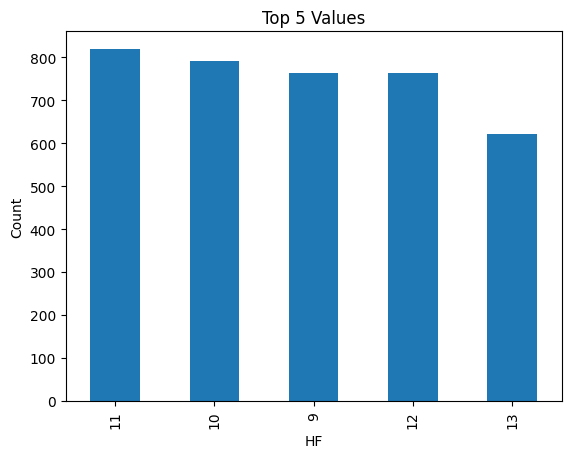

In [ ]:
import matplotlib.pyplot as plt

top = df['HF'].value_counts().head(5)
top.plot(kind='bar', title='Top 5 Values')
plt.ylabel("Count")
plt.show()


In [ ]:
print(df.columns)


Index(['Incremental_ID', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


In [ ]:
# For text files
if filename.endswith(".txt"):
    with open(filename, "r") as file:
        content = file.read()

    response = ask_llama(f"Here is a text document:\n\n{content}\n\nSummarize this.")
    print("🤖 Llama Summary of TXT:\n")
    print(response)


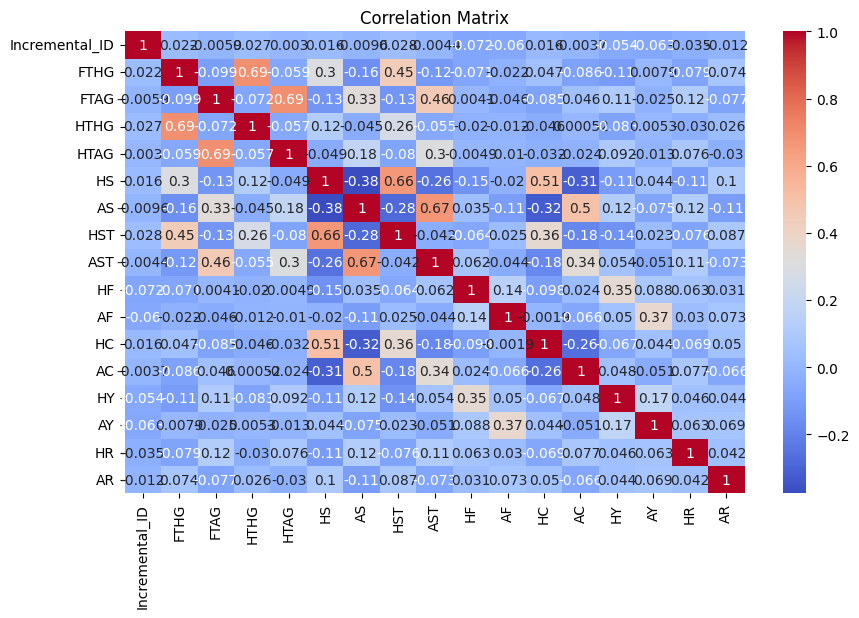

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(5))



Column: Div
Div
E0    7220
Name: count, dtype: int64

Column: Date
Date
12/26/2013    10
5/19/2013     10
1/1/2014      10
12/26/2005    10
12/31/2005    10
Name: count, dtype: int64

Column: Time
Time
15:00    559
20:00    234
14:00    227
17:30    173
12:30    151
Name: count, dtype: int64

Column: HomeTeam
HomeTeam
Everton       363
Arsenal       363
Chelsea       363
Man United    363
Liverpool     362
Name: count, dtype: int64

Column: AwayTeam
AwayTeam
Tottenham     363
Man City      363
Liverpool     363
Man United    362
Chelsea       362
Name: count, dtype: int64

Column: FTR
FTR
H    3330
A    2169
D    1751
Name: count, dtype: int64

Column: HTR
HTR
D    2966
H    2533
A    1751
Name: count, dtype: int64

Column: Referee
Referee
M Dean        476
M Atkinson    456
A Marriner    388
M Oliver      377
A Taylor      374
Name: count, dtype: int64


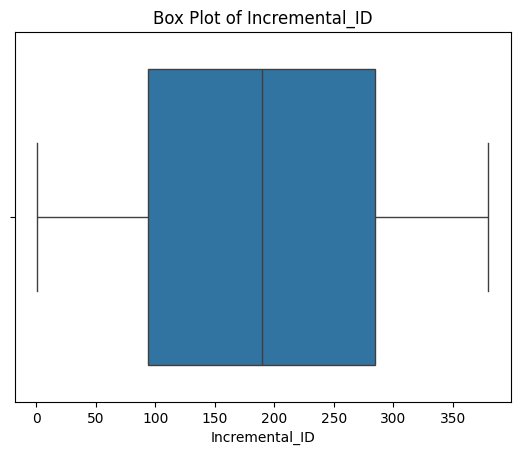

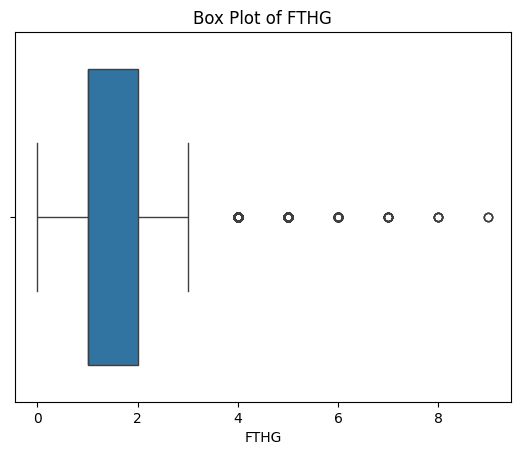

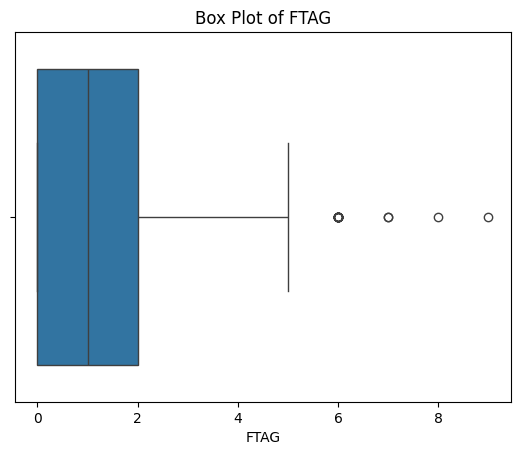

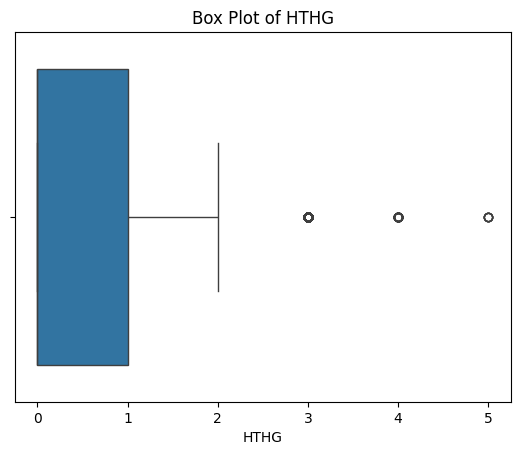

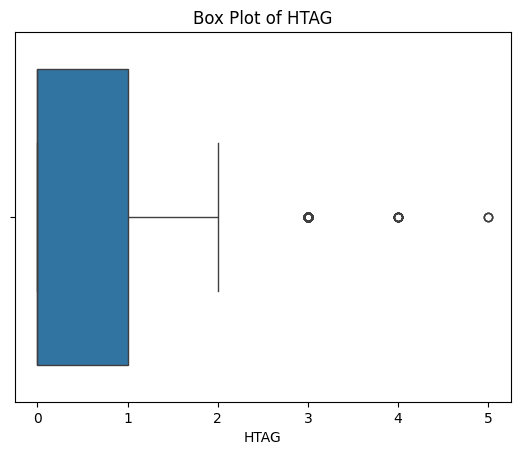

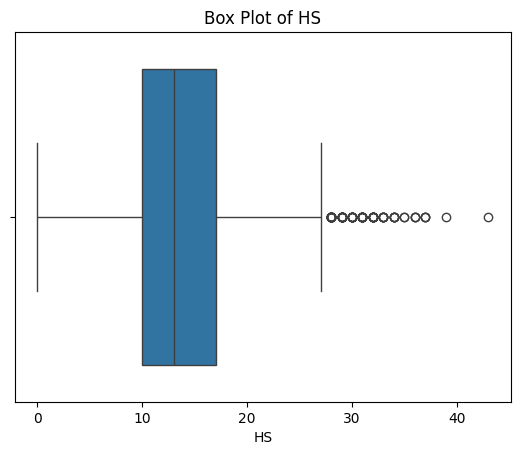

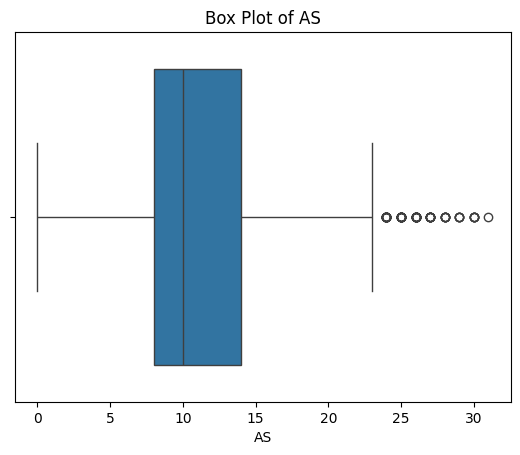

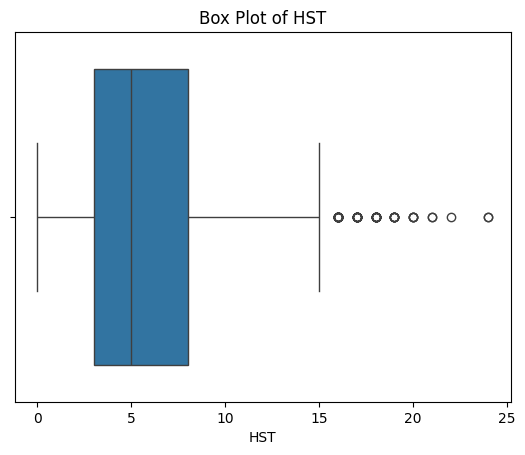

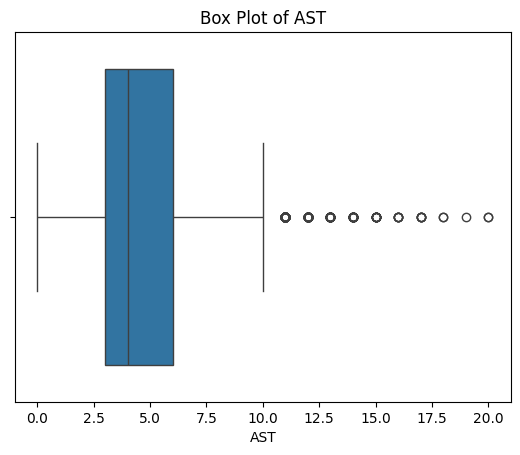

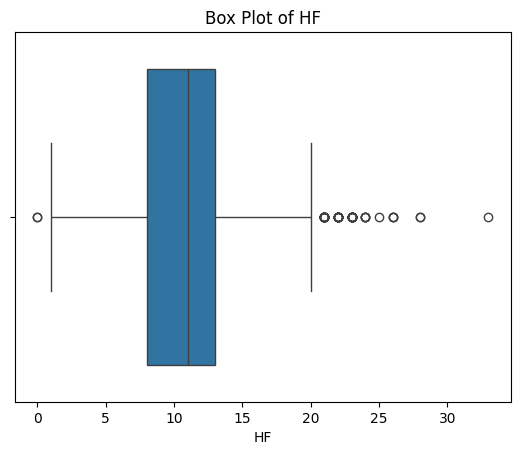

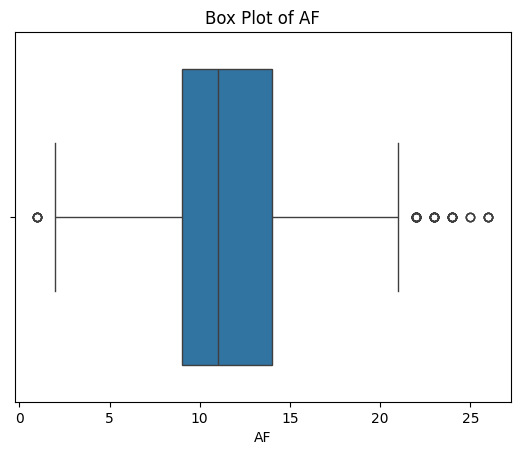

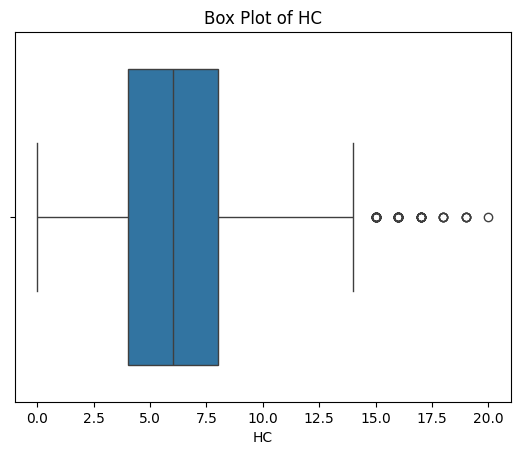

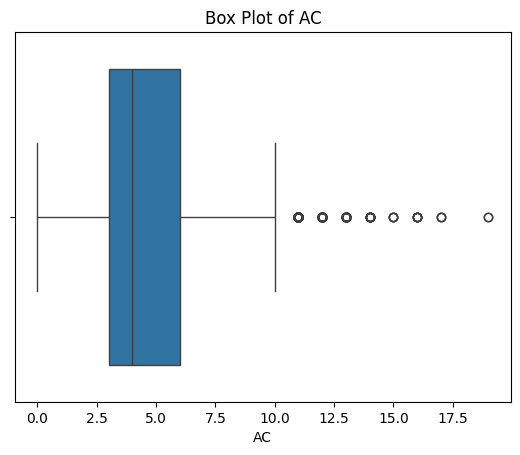

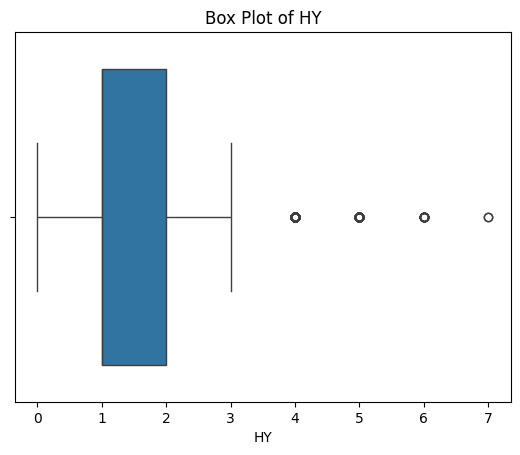

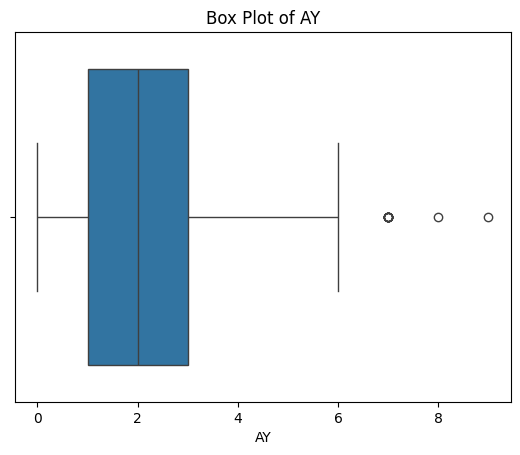

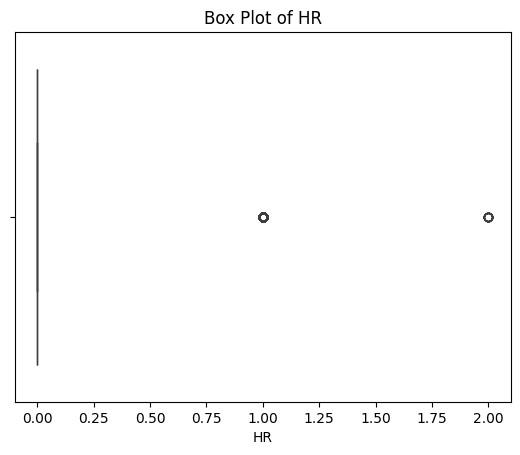

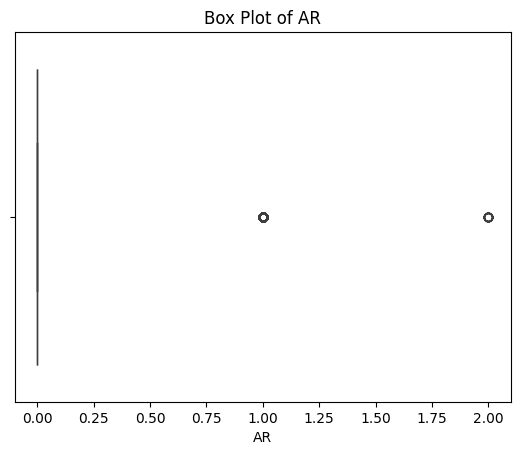

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()
